$\LARGE{\textbf{Beyond the Two-Level System}}$

# Table of Contents

* [Report](#report)
    * [Introduction](#introduction)
    * [Problem and Method](#problem-and-method)
    * [Results](#results)
    * [Conclusion](#conclusion)
* [Code](#code)
    * [Setup](#setup)
    * [Task 1](#task-1)
        * [0 $\rightarrow$ 1 Frequency Sweep](#find-the-frequency-of-the-0⟩-→-1⟩-transition)
        * [0 $\rightarrow$ 1 Rabi Experiment](#calibrate-the-pulse-for-the-0⟩-→-1⟩-transition-using-a-rabi-experiment)
    * [Task 2](#task-2)
        * [1 $\rightarrow$ 2 Frequency Sweep](#find-the-frequency-of-the-0⟩-→-1⟩-transition)
        * [1 $\rightarrow$ 2 Rabi Experiment](#calibrate-the-pulse-for-the-0⟩-→-1⟩-transition-using-a-rabi-experiment)
    * [Task 3](#task-3)
        * [IQ Discriminator (0, 1, 2)](#build-an-iq-discriminator-for-distinguishing-the-states-into-0⟩-1⟩-and-2⟩)
        * [State Classifier](#create-a-classifier-to-define-the-qubit-state)
    * [Task 4](#task-3)
        * [0 $\rightarrow$ 1 Amplitude v. Occupation Probability (0, 1, 2)](#estimate-the-occupation-probability-for-0⟩-1⟩-and-2⟩-near-the-calibrated-pulse-of-the-0⟩-→-1⟩-transition)
    * [Bonus](#bonus)
        * [2 $\rightarrow$ 3 Frequency Sweep](#find-the-frequency-of-the-2⟩-→-3⟩-transition)
        * [2 $\rightarrow$ 3 Rabi Experiment](#calibrate-the-pulse-for-the-2⟩-→-3⟩-transition-using-a-rabi-experiment)
        * [IQ Discriminator (0, 1, 2, 3)](#build-an-iq-discriminator-for-distinguishing-the-states-into-0⟩-1⟩-2⟩-and-3⟩)
        * [0 $\rightarrow$ 1 Amplitude v. Occupation Probability (0, 1, 2)](#estimate-the-occupation-probability-for-0⟩-1⟩-2⟩-and-3⟩-near-the-calibrated-pulse-of-the-0⟩-→-1⟩-transition)
        * [0 $\rightarrow$ 1 Frequency v. Occupation Probability (0, 1, 2)](#estimate-the-occupation-probability-for-0⟩-1⟩-2⟩-and-3⟩-near-the-calibrated-frequency-of-the-0⟩-→-1⟩-transition)

# Report

## Introduction

In class, the quantum computational model is restricted to the 2-state manifold. That is, only the ground state |0⟩ and the first excited state |1⟩ are considered. However, this model is a simplification of real-world behavior. Whereas most quantum algorithms and functions used by quantum computers use only two qubit states, higher excited states of qubits exist and can occur in computation, regardless of intention. Imperfections in realistic systems can excite qubits into these higher energy states, which makes it difficult to constrain a qubit to the two-state model. This in turn can cause problems for algorithms working with only the two main qubit states.

In this project, however, qubits will be intentionally driven to attempt to access a higher state. Using Qiskit as an interface to work with the IBM Quantum systems, pulses with specified parameters will be delivered to transmon qubits. The qubits that receive the pulse will be measured to indicate ideal transition frequencies and amplitudes. Using this data, the state can be classified according to its IQ data. Using this classification, the occupation probability can be modelled in correspondence with pulse parameters.

## Problem and Method

The goal of the experiment is to gain a clearer understanding of the higher level excited states of qubits. To do this, Qiskit Pulse is used to perform tests on the IBM Quantum systems to determine how to access, classify, and drive to the higher energy states of qubits.

First, the properties of a qubit in the ground state (i.e., before being driven) are determined. To do this, a frequency sweep is conducted. This is an experiment to find the effect of different pulse frequencies on measured qubit signals. The results are used to determine the frequency needed to drive the qubit from the ground state to the first excited state. As the frequency must be resonant with the qubit frequency, the transition frequency must also be the qubit frequency.

Then, a Rabi experiment is performed on a ground state qubit. This determines the strength of a $\pi$ pulse to take the qubit from the ground to first excited state. The experiment varies the drive amplitude and measures the qubit state in order to find the amplitude that most likely accesses the first excited state.

From these two experiments, parameters can be given for a pulse that has reasonably high probability to excite to |1⟩.

This process can then be continued for higher state analysis. Particularly, another frequency sweep is used to determine the frequency needed to drive the qubit from the first to second excited state. Then the amplitude of the $\pi$ pulse can be found for this transition as well.

This can continue to be repeated by exciting a qubit using the previously found pulses. In this project, the transitions studied are |0⟩ $\rightarrow$ |1⟩, |1⟩ $\rightarrow$ |2⟩, and |2⟩ $\rightarrow$ |3⟩.

Using this data, an IQ discriminator can be built to classify the qubit states. This allows for determining the state of a qubit based on the measurement received from the IBM Quantum systems. From this model, the drive parameters could be modified and analyzed as related to the classified qubit state. This allows for a probabalistic relation between the pulse and the qubit state.

In a quantum circuit, there is a |0⟩ $\rightarrow$ |1⟩ transition in the form of an X gate. This gate is very common in quantum circuits and is defined as a two-state NOT gate. However, there is a non-zero probability that it does not reach the first excited state. Therefore, the transition can be studied. This is done by driving a ground state qubit to the first excited state with varying power or frequency and determining the occupation probability of the qubit state. This measure can shed light on the reliability of quantum circuits as they relate to higher energy levels. 

## Results

The frequency sweep of the |0⟩ $\rightarrow$ |1⟩ transition seemed to give reliable data, as the points on the scatter plot formed a smooth curve. The extremum of the regression was found to be 4.96234 GHz. This was a similar value compared to IBM Quantum's estimate for the qubit frequency. The Rabi experiment also seemed reliable. The curve was similar to that found in Qiskit's resources, and the regression matched the data well. The amplitude of the $\pi$ pulse was found to be 0.09533.

The experiments for |1⟩ $\rightarrow$ |2⟩ produced somewhat noisier data. However, the data still aligned with Qiskit's which gave confidence to the values. The frequency was found to be 4.61859 GHz and the amplitude was found to be 0.17595. 

The |2⟩ $\rightarrow$ |3⟩ transition was the most difficult to determine. The frequency sweep yielded a scatter plot with two separate trends in data. There were observable peaks in the data, which was honed in on to get the transition frequency of 4.22 GHz. The Rabi experiment was much less noisy, giving a value of 0.31371.

The IQ Discriminator had a distinct separation between the |0⟩ and |1⟩ states. However, the distinction became less and less clear as the energy level increased. As a result, the classifiers for |1⟩ and |2⟩ had some overlap, and |2⟩ and |3⟩ had almost identical data clusters.

The probability experiments left the most to be desired. The first occupation probability experiment failed to register most qubits in the first excited state, despite being a |0⟩ $\rightarrow$ |1⟩ transition. However, as more states were added, the occupation probability made more sense. However, there were no resonance shaped peaks.

## Conclusion

The results yielded relatively expected results.

The two-level system of |0⟩ and |1⟩ mostly held consistent, with only some probability of escaping the manifold under differently parameterized pulses. However, this was based on classification data, which cannot be proven outright.

This is especially the case because of the amount of overlap in the data. The clusters of different qubit states were not distinct, which indicates either that the pulse did not drive the qubit to the higher state or that the states end up being very similar. The |2⟩ $\rightarrow$ |3⟩ transition frequency seems to show that a qubit does not always get excited, even driven resonantly. In either case, this goes to the quantum circuits benefit, as leakage is either infrequent or negligible in many cases, even at resonance.

It is hard to conclude anything necessarily from the data, as there is a lot of noise throughout. However, it can be understood that the two-level system is fairly robust.

# Code

## Setup

In [611]:
## general qiskit imports

import warnings
warnings.filterwarnings('ignore')
from qiskit.tools.jupyter import *
from qiskit import IBMQ
import numpy as np
from qiskit import pulse
from qiskit.circuit import Parameter
from qiskit.circuit import QuantumCircuit, Gate
from qiskit import schedule
from qiskit.tools.monitor import job_monitor
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from qutip import destroy

In [612]:
## load IBMQ account and set the appropriate backend

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_manila')

ibmqfactory.load_account:WARNING:2022-12-17 23:48:08,196: Credentials are already in use. The existing account in the session will be replaced.


In [613]:
## verify that the backend supports Pulse features by checking the backend configuration

backend_config = backend.configuration()

In [614]:
##  find the sampling time for the backend pulses within the backend configuration

dt = backend_config.dt
print(f"Sampling time: {dt*1e9} ns")

Sampling time: 0.2222222222222222 ns


In [615]:
## use granurality to determine the length of the pulse

acquire_alignment = backend.configuration().timing_constraints['acquire_alignment']
granularity = backend.configuration().timing_constraints['granularity']
pulse_alignment = backend.configuration().timing_constraints['pulse_alignment']

In [616]:
## find least common multiple

lcm = np.lcm(acquire_alignment, pulse_alignment)
print(f"Least common multiple of acquire_alignment and pulse_alignment: {lcm}")

Least common multiple of acquire_alignment and pulse_alignment: 16


In [617]:
## access estimates for qubit frequencies and default programs to enact basic quantum operators

backend_defaults = backend.defaults()

## Task 1

### Find the frequency of the |0⟩ → |1⟩ transition

In [618]:
## define frequency range for sweep in search of the qubit, restricting to a window of 40 MHz around the estimated qubit frequency

# unit conversion factors -> all backend properties returned in SI (Hz, sec, etc.)
GHz = 1.0e9 # Gigahertz
MHz = 1.0e6 # Megahertz
us = 1.0e-6 # Microseconds
ns = 1.0e-9 # Nanoseconds

# We will find the qubit frequency for the following qubit.
qubit = 0

# The sweep will be centered around the estimated qubit frequency.
center_frequency_Hz = backend_defaults.qubit_freq_est[qubit]
print(f"Qubit {qubit} has an estimated frequency of {center_frequency_Hz / GHz} GHz.")

# scale factor to remove factors of 10 from the data
scale_factor = 1e-7

# We will sweep 40 MHz around the estimated frequency
frequency_span_Hz = 40 * MHz
# in steps of 1 MHz.
frequency_step_Hz = 1 * MHz

# We will sweep 20 MHz above and 20 MHz below the estimated frequency
frequency_min = center_frequency_Hz - frequency_span_Hz / 2
frequency_max = center_frequency_Hz + frequency_span_Hz / 2
# Construct an np array of the frequencies for our experiment
frequencies_GHz = np.arange(frequency_min / GHz, 
                            frequency_max / GHz, 
                            frequency_step_Hz / GHz)

print(f"The sweep will go from {frequency_min / GHz} GHz to {frequency_max / GHz} GHz \
in steps of {frequency_step_Hz / MHz} MHz.")

Qubit 0 has an estimated frequency of 4.962290837970019 GHz.
The sweep will go from 4.9422908379700194 GHz to 4.9822908379700195 GHz in steps of 1.0 MHz.


In [619]:
## define helper functions for pulse flow

# drive pulse of a frequency
def get_closest_multiple_of(value, base_number):
    return int(value + base_number/2) - (int(value + base_number/2) % base_number)

# determine the length of the pulse
def get_closest_multiple_of_16(num):
    return get_closest_multiple_of(num, granularity)

# adjust the length of the delay
def get_dt_from(sec):
    return get_closest_multiple_of(sec/dt, lcm)

In [620]:
## create a pulse schedule

# Drive pulse parameters
drive_sigma_sec = 0.015 * us # actual width of the gaussian pulse
drive_duration_sec = drive_sigma_sec * 8 # truncating parameter, as gaussians don't have a natural finite length
drive_amp = 0.05

# Create the base schedule, start with drive pulse acting on the drive channel
freq = Parameter('freq')
with pulse.build(backend=backend, default_alignment='sequential', name='Frequency sweep') as sweep_sched:
    drive_duration = get_closest_multiple_of_16(pulse.seconds_to_samples(drive_duration_sec))
    drive_sigma = pulse.seconds_to_samples(drive_sigma_sec)
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(freq, drive_chan)
    # Drive pulse samples
    pulse.play(pulse.Gaussian(duration=drive_duration,
                              sigma=drive_sigma,
                              amp=drive_amp,
                              name='freq_sweep_excitation_pulse'), drive_chan)

In [621]:
## create sweep

sweep_gate = Gate("sweep", 1, [freq])

qc_sweep = QuantumCircuit(1, 1)

qc_sweep.append(sweep_gate, [0])
qc_sweep.measure(0, 0)
qc_sweep.add_calibration(sweep_gate, (0,), sweep_sched, [freq])

# Create the frequency settings for the sweep (MUST BE IN HZ)
frequencies_Hz = frequencies_GHz*GHz
exp_sweep_circs = [qc_sweep.assign_parameters({freq: f}, inplace=False) for f in frequencies_Hz]

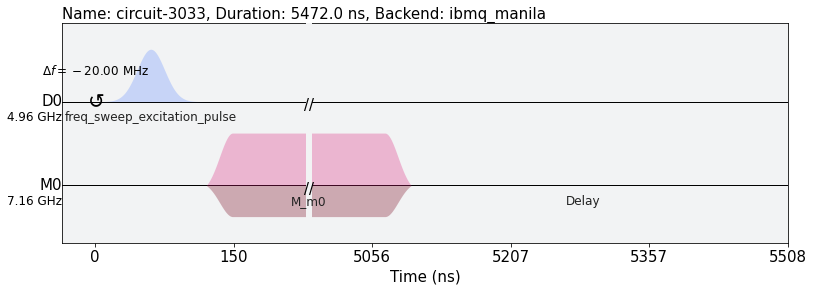

In [622]:
## draw sweep schedule

sweep_schedule = schedule(exp_sweep_circs[0], backend)
sweep_schedule.draw(backend=backend)

In [623]:
## run assembled program on backend

num_shots_per_frequency = 1024

job = backend.run(exp_sweep_circs, 
                  meas_level=1, 
                  meas_return='avg', 
                  shots=num_shots_per_frequency)

In [624]:
## monitor job status

job_monitor(job)

Job Status: job has successfully run


In [625]:
## retrieve job results

frequency_sweep_results = job.result(timeout=120)

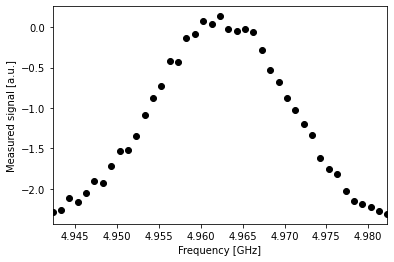

In [626]:
## plot job results

sweep_values = []
for i in range(len(frequency_sweep_results.results)):
    # Get the results from the ith experiment
    res = frequency_sweep_results.get_memory(i)*scale_factor
    # Get the results for `qubit` from this experiment
    sweep_values.append(res[qubit])

plt.scatter(frequencies_GHz, np.real(sweep_values), color='black') # plot real part of sweep values
plt.xlim([min(frequencies_GHz), max(frequencies_GHz)])
plt.xlabel("Frequency [GHz]")
plt.ylabel("Measured signal [a.u.]")
plt.show()

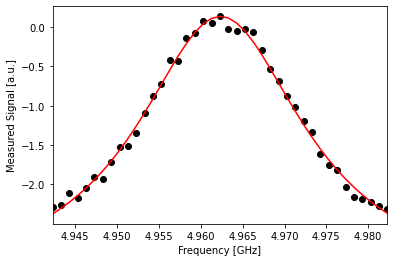

In [627]:
## fit values to a curve

def fit_function(x_values, y_values, function, init_params):
    fitparams, conv = curve_fit(function, x_values, y_values, init_params)
    y_fit = function(x_values, *fitparams)
    
    return fitparams, y_fit

fit_params, y_fit = fit_function(frequencies_GHz,
                                 np.real(sweep_values), 
                                 lambda x, A, q_freq, B, C: (A / np.pi) * (B / ((x - q_freq)**2 + B**2)) + C,
                                 [1, 4.975, 1, -2] # initial parameters for curve_fit
                                )

plt.scatter(frequencies_GHz, np.real(sweep_values), color='black')
plt.plot(frequencies_GHz, y_fit, color='red')
plt.xlim([min(frequencies_GHz), max(frequencies_GHz)])

plt.xlabel("Frequency [GHz]")
plt.ylabel("Measured Signal [a.u.]")
plt.show()

In [628]:
## derive frequency using peak

A, rough_qubit_frequency, B, C = fit_params
rough_qubit_frequency = rough_qubit_frequency*GHz # make sure qubit freq is in Hz
print(f"Updated qubit frequency estimate from "
      f"{round(backend_defaults.qubit_freq_est[qubit] / GHz, 5)} GHz to {round(rough_qubit_frequency/GHz, 5)} GHz.")

Updated qubit frequency estimate from 4.96229 GHz to 4.96234 GHz.


### Calibrate the $\pi$ pulse for the |0⟩ → |1⟩ transition using a Rabi experiment

In [629]:
## Set Rabi experiment parameters

# Rabi experiment parameters
num_rabi_points = 75

# Drive amplitude values to iterate over: 50 amplitudes evenly spaced from 0 to 0.75
drive_amp_min = 0
drive_amp_max = 1.0
drive_amps = np.linspace(drive_amp_min, drive_amp_max, num_rabi_points)

In [630]:
## Build Rabi experiments

# A drive pulse at the qubit frequency, followed by a measurement, vary the drive amplitude each time
drive_amp = Parameter('drive_amp')
with pulse.build(backend=backend, default_alignment='sequential', name='Rabi Experiment') as rabi_sched:
    drive_duration = get_closest_multiple_of_16(pulse.seconds_to_samples(drive_duration_sec))
    drive_sigma = pulse.seconds_to_samples(drive_sigma_sec)
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(rough_qubit_frequency, drive_chan)
    pulse.play(pulse.Gaussian(duration=drive_duration,
                              amp=drive_amp,
                              sigma=drive_sigma,
                              name='Rabi Pulse'), drive_chan)

In [631]:
## create Rabi circuit

rabi_gate = Gate("rabi", 1, [drive_amp])

qc_rabi = QuantumCircuit(1, 1)

qc_rabi.append(rabi_gate, [0])
qc_rabi.measure(0, 0)
qc_rabi.add_calibration(rabi_gate, (0,), rabi_sched, [drive_amp])

exp_rabi_circs = [qc_rabi.assign_parameters({drive_amp: a}, inplace=False) for a in drive_amps]

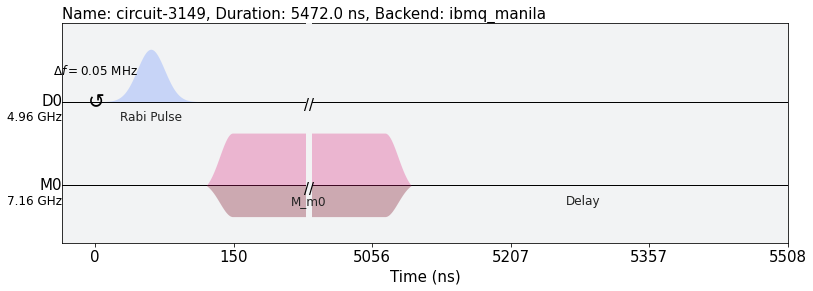

In [632]:
## draw Rabi schedule

rabi_schedule = schedule(exp_rabi_circs[-1], backend)
rabi_schedule.draw(backend=backend)

In [633]:
## run assembled program on backend

num_shots_per_point = 1024

job = backend.run(exp_rabi_circs, 
                  meas_level=1, 
                  meas_return='avg', 
                  shots=num_shots_per_point)

In [634]:
## monitor job status

job_monitor(job)

Job Status: job is queued (4)     

Job Status: job has successfully run


In [635]:
## retrieve job results

rabi_results = job.result(timeout=120)

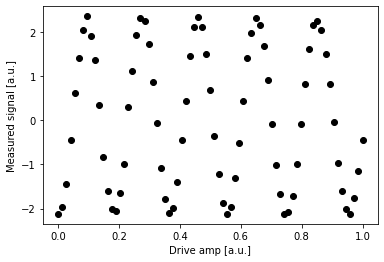

In [636]:
## plot job results

# center data around 0
def baseline_remove(values):
    return np.array(values) - np.mean(values)

rabi_values = []
for i in range(num_rabi_points):
    # Get the results for `qubit` from the ith experiment
    rabi_values.append(rabi_results.get_memory(i)[qubit] * scale_factor)

rabi_values = np.real(baseline_remove(rabi_values))

plt.xlabel("Drive amp [a.u.]")
plt.ylabel("Measured signal [a.u.]")
plt.scatter(drive_amps, rabi_values, color='black') # plot real part of Rabi values
plt.show()

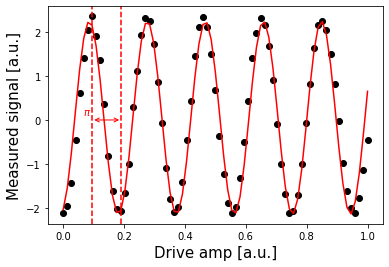

In [637]:
## fit values to a curve

fit_params, y_fit = fit_function(drive_amps,
                                 rabi_values, 
                                 lambda x, A, B, drive_period, phi: (A*np.cos(2*np.pi*x/drive_period - phi) + B),
                                 [-2, 0, 0.2, 0])

plt.scatter(drive_amps, rabi_values, color='black')
plt.plot(drive_amps, y_fit, color='red')

drive_period = fit_params[2] # get period of rabi oscillation

pi_amp = drive_period/2

plt.axvline(drive_period/2, color='red', linestyle='--')
plt.axvline(drive_period, color='red', linestyle='--')
plt.annotate("", xy=(drive_period, 0), xytext=(drive_period/2,0), arrowprops=dict(arrowstyle="<->", color='red'))
plt.annotate("$\pi$", xy=(drive_period/2-0.03, 0.1), color='red')

plt.xlabel("Drive amp [a.u.]", fontsize=15)
plt.ylabel("Measured signal [a.u.]", fontsize=15)
plt.show()

In [638]:
## print pi amplitude

print(f"Pi Amplitude = {round(pi_amp, 5)}")

Pi Amplitude = 0.09533


## Task 2

### Find the frequency of the |1⟩ → |2⟩ transition

In [639]:
## define smaller range sweep
backend_properties = backend.properties()

default_anharmonicity = backend_properties.qubits[qubit][3].value # Default anharmonicity in GHz

num_freqs = 75
drive_power = 0.15
sweep_freqs = default_anharmonicity*GHz + np.linspace(-30*MHz, 30*MHz, num_freqs)

# there are pulse parameters of the single qubit drive in IBM devices
x12_duration = 160
x12_sigma = 40

In [640]:
# helper function

def get_job_data(job, average):
    job_results = job.result(timeout = 120) # timeout parameter set to 120 s
    result_data = []
    for i in range(len(job_results.results)):
        if average: # get avg data
            result_data.append(np.real(job_results.get_memory(i)[qubit] * scale_factor))
        else: # get single data
            result_data.append(job_results.get_memory(i)[:, qubit] * scale_factor)
    return result_data

In [641]:
## create a pulse schedule

freq = Parameter('freq')
with pulse.build(backend=backend, default_alignment='sequential', name='Frequency sweep') as freq12_sweep_sched:
    drive_chan = pulse.drive_channel(qubit)
    with pulse.frequency_offset(freq, drive_chan):
        pulse.play(pulse.Gaussian(duration=x12_duration,
                                  amp=drive_power,
                                  sigma=x12_sigma,
                                  name='x12_pulse'), drive_chan)

In [642]:
## excite qubit to the 1 state
spect_gate = Gate("spect", 1, [freq])
qc_spect = QuantumCircuit(1, 1)
qc_spect.x(0)
qc_spect.append(spect_gate, [0])
qc_spect.measure(0, 0)
qc_spect.add_calibration(spect_gate, (0,), freq12_sweep_sched, [freq])
    
exp_spect_circs = [qc_spect.assign_parameters({freq: f}) for f in sweep_freqs]

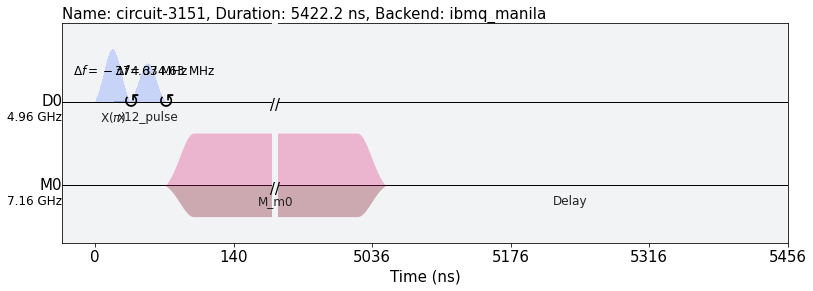

In [643]:
## draw sweep schedule

freq12_sweep_sched = schedule(exp_spect_circs[0], backend)
freq12_sweep_sched.draw(backend=backend)

In [644]:
## run assembled program on backend

num_shots_per_frequency = 1024

excited_freq_sweep_job = backend.run(exp_spect_circs, 
                                     meas_level=1, 
                                     meas_return='avg', 
                                     shots=num_shots_per_frequency)

In [645]:
## monitor job status

job_monitor(excited_freq_sweep_job)

Job Status: job has successfully run


In [646]:
## retrieve job results

excited_freq_sweep_data = get_job_data(excited_freq_sweep_job, average=True)
excited_sweep_freqs = rough_qubit_frequency + default_anharmonicity*GHz + np.linspace(-30*MHz, 30*MHz, num_freqs)
frequency_sweep_results = job.result(timeout=120)

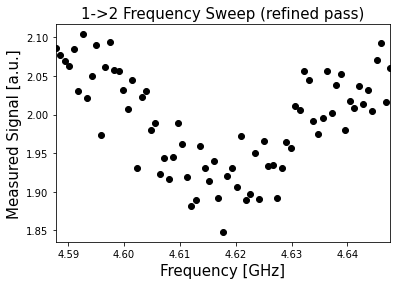

In [647]:
## plot job results

sweep_values = []
for i in range(len(frequency_sweep_results.results)):
    # Get the results from the ith experiment
    res = frequency_sweep_results.get_memory(i)*scale_factor
    # Get the results for `qubit` from this experiment
    sweep_values.append(res[qubit])

plt.scatter(excited_sweep_freqs/GHz, excited_freq_sweep_data, color='black')
plt.xlim([min(excited_sweep_freqs/GHz), max(excited_sweep_freqs/GHz)])
plt.xlabel("Frequency [GHz]", fontsize=15)
plt.ylabel("Measured Signal [a.u.]", fontsize=15)
plt.title("1->2 Frequency Sweep (refined pass)", fontsize=15)
plt.show()

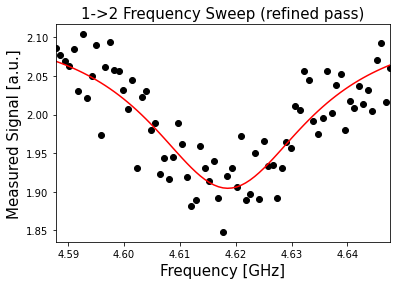

In [648]:
## fit values to a curve

(excited_sweep_fit_params, 
 excited_sweep_y_fit) = fit_function(excited_sweep_freqs,
                                     excited_freq_sweep_data, 
                                     lambda x, A, q_freq, B, C: (A / np.pi) * (B / ((x - q_freq)**2 + B**2)) + C,
                                     [-20, 4.625*GHz, 0.06*GHz, 3*GHz] # initial parameters for curve_fit
                                     )

# Note: only plotting the real part of the signal
plt.scatter(excited_sweep_freqs/GHz, excited_freq_sweep_data, color='black')
plt.plot(excited_sweep_freqs/GHz, excited_sweep_y_fit, color='red')
plt.xlim([min(excited_sweep_freqs/GHz), max(excited_sweep_freqs/GHz)])
plt.xlabel("Frequency [GHz]", fontsize=15)
plt.ylabel("Measured Signal [a.u.]", fontsize=15)
plt.title("1->2 Frequency Sweep (refined pass)", fontsize=15)
plt.show()

In [649]:
## derive frequency using peak

_, qubit_12_freq, _, _ = excited_sweep_fit_params
print(f"1->2 frequency: {round(qubit_12_freq/GHz, 5)} GHz.")

1->2 frequency: 4.61859 GHz.


In [650]:
## Calculate anharmonicity

anharmonicity_01_12 = qubit_12_freq - rough_qubit_frequency
print(f"Updated anharmonicity estimate from "
      f"{round(default_anharmonicity, 5)} GHz to {round(anharmonicity_01_12/GHz, 5)} GHz.")

Updated anharmonicity estimate from -0.34463 GHz to -0.34375 GHz.


### Calibrate the π pulse for the |1⟩ → |2⟩ transition using a Rabi experiment

In [651]:
## Set Rabi experiment parameters

num_rabi_points = 75

# Drive amplitude values to iterate over: 75 amplitudes evenly spaced from 0 to 1.0
drive_amp_min = 0
drive_amp_max = 1.0
drive_amps = np.linspace(drive_amp_min, drive_amp_max, num_rabi_points)

In [652]:
## Build Rabi experiments

# A drive pulse at the qubit frequency, followed by a measurement, vary the drive amplitude each time
amp = Parameter('amp')
with pulse.build(backend=backend, default_alignment='sequential', name='Amp sweep') as rabi_sched:
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(qubit_12_freq, drive_chan)
    pulse.play(pulse.Gaussian(duration=x12_duration,
                              amp=amp,
                              sigma=x12_sigma,
                              name='x12_pulse'), drive_chan)

In [653]:
## create Rabi circuit

rabi_gate = Gate("rabi", 1, [amp])

qc_rabi = QuantumCircuit(1, 1)

qc_rabi.x(0)
qc_rabi.append(rabi_gate, [0])
qc_rabi.measure(0, 0)
qc_rabi.add_calibration(rabi_gate, (0,), rabi_sched, [amp])
    
exp_rabi_circs = [qc_rabi.assign_parameters({amp: a}) for a in drive_amps]

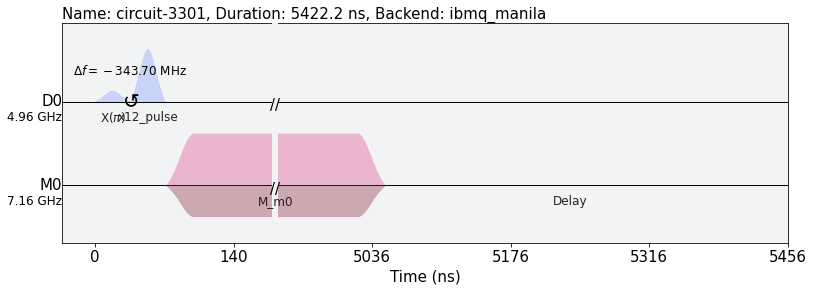

In [654]:
## draw Rabi schedule

rabi_schedule = schedule(exp_rabi_circs[-1], backend)
rabi_schedule.draw(backend=backend)

In [655]:
## run assembled program on backend

num_shots_per_frequency = 1024

rabi_12_job = backend.run(exp_rabi_circs, 
                          meas_level=1, 
                          meas_return='avg', 
                          shots=num_shots_per_frequency)

In [656]:
## monitor job status

job_monitor(rabi_12_job)

Job Status: job has successfully run


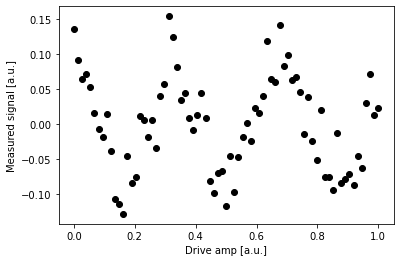

In [657]:
## retrieve job results

rabi_12_data = np.real(baseline_remove(get_job_data(rabi_12_job, average=True)))

plt.xlabel("Drive amp [a.u.]")
plt.ylabel("Measured signal [a.u.]")
plt.scatter(drive_amps, rabi_12_data, color='black') # plot real part of Rabi values
plt.show()

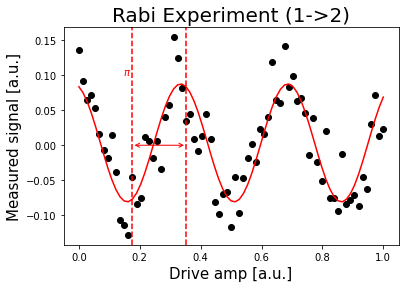

In [658]:
## fit values to a curve

(rabi_12_fit_params, 
 rabi_12_y_fit) = fit_function(drive_amps,
                               rabi_12_data, 
                               lambda x, A, B, drive_12_period, phi: (A*np.cos(2*np.pi*x/drive_12_period - phi) + B),
                               [0.2, 0, 0.3, 0])

plt.scatter(drive_amps, rabi_12_data, color='black')
plt.plot(drive_amps, rabi_12_y_fit, color='red')

drive_12_period = rabi_12_fit_params[2] 

pi_amp_12 = drive_12_period/2

plt.axvline(pi_amp_12, color='red', linestyle='--')
plt.axvline(pi_amp_12+drive_12_period/2, color='red', linestyle='--')
plt.annotate("", xy=(pi_amp_12+drive_12_period/2, 0), xytext=(pi_amp_12,0), arrowprops=dict(arrowstyle="<->", color='red'))
plt.annotate("$\pi$", xy=(pi_amp_12-0.03, 0.1), color='red')

plt.xlabel("Drive amp [a.u.]", fontsize=15)
plt.ylabel("Measured signal [a.u.]", fontsize=15)
plt.title('Rabi Experiment (1->2)', fontsize=20)
plt.show()

In [659]:
## print pi amplitude

print(f"Pi Amplitude (1->2) = {round(pi_amp_12, 5)}")

Pi Amplitude (1->2) = 0.17595


## Task 3

### Build an IQ discriminator for distinguishing the states into |0⟩, |1⟩, and |2⟩

In [660]:
## Schedule pulse from 1->2

with pulse.build(backend=backend, default_alignment='sequential', name='x12 schedule') as x12_sched:
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(qubit_12_freq, drive_chan)
    pulse.play(pulse.Gaussian(duration=x12_duration,
                              amp=pi_amp_12,
                              sigma=x12_sigma,
                              name='x12_pulse'), drive_chan)

In [661]:
## Create 3 circuits

# 0 state
qc_ground = QuantumCircuit(1, 1)
qc_ground.measure(0, 0)

# 1 state
qc_one = QuantumCircuit(1, 1)
qc_one.x(0)
qc_one.measure(0, 0)

# 2 state 
x12_gate = Gate("one_two_pulse", 1, [])
qc_x12 = QuantumCircuit(1, 1)
qc_x12.x(0)
qc_x12.append(x12_gate, [0])
qc_x12.measure(0, 0)
qc_x12.add_calibration(x12_gate, (0,), x12_sched, [])

In [662]:
## run assembled program on backend

num_shots_per_frequency = 1024

IQ_012_job = backend.run([qc_ground, qc_one, qc_x12], 
                          meas_level=1, 
                          meas_return='single', 
                          shots=num_shots_per_frequency)

In [ ]:
## monitor job status

job_monitor(IQ_012_job)

In [ ]:
## retrieve job results

IQ_012_data = get_job_data(IQ_012_job, average=False)
zero_data = IQ_012_data[0]
one_data = IQ_012_data[1]
two_data = IQ_012_data[2]

Text(0.5, 1.0, '0-1 discrimination')

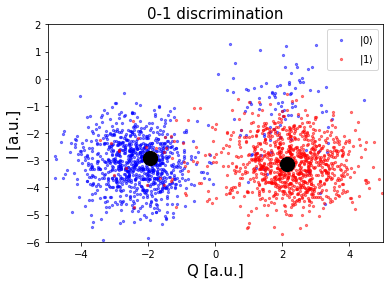

In [ ]:
## plot the distributions of 0, 1

plt.scatter(np.real(zero_data), np.imag(zero_data), 
                s=5, cmap='viridis', c='blue', alpha=0.5, label=r'$|0\rangle$')
# one data plotted in red
plt.scatter(np.real(one_data), np.imag(one_data), 
                s=5, cmap='viridis', c='red', alpha=0.5, label=r'$|1\rangle$')

# Plot a large dot for the average result of the 0, 1 and 2 states.
mean_zero = np.mean(zero_data) # takes mean of both real and imaginary parts
mean_one = np.mean(one_data)
plt.scatter(np.real(mean_zero), np.imag(mean_zero), 
            s=200, cmap='viridis', c='black',alpha=1.0)
plt.scatter(np.real(mean_one), np.imag(mean_one), 
            s=200, cmap='viridis', c='black',alpha=1.0)

plt.xlim(-5, 5)
plt.ylim(-6, 2)
plt.legend()
plt.ylabel('I [a.u.]', fontsize=15)
plt.xlabel('Q [a.u.]', fontsize=15)
plt.title("0-1 discrimination", fontsize=15)

Text(0.5, 1.0, '0-1-2 discrimination')

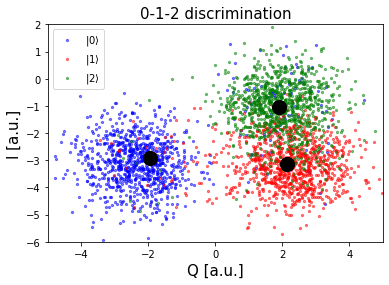

In [ ]:
## plot the distributions for 0, 1, 2

# one data plotted in blue
plt.scatter(np.real(zero_data), np.imag(zero_data), 
                s=5, cmap='viridis', c='blue', alpha=0.5, label=r'$|0\rangle$')
# one data plotted in red
plt.scatter(np.real(one_data), np.imag(one_data), 
                s=5, cmap='viridis', c='red', alpha=0.5, label=r'$|1\rangle$')
# two data plotted in green
plt.scatter(np.real(two_data), np.imag(two_data), 
                s=5, cmap='viridis', c='green', alpha=0.5, label=r'$|2\rangle$')

# Plot a large dot for the average result of the 0, 1 and 2 states.
mean_zero = np.mean(zero_data) # takes mean of both real and imaginary parts
mean_one = np.mean(one_data)
mean_two = np.mean(two_data)
plt.scatter(np.real(mean_zero), np.imag(mean_zero), 
            s=200, cmap='viridis', c='black',alpha=1.0)
plt.scatter(np.real(mean_one), np.imag(mean_one), 
            s=200, cmap='viridis', c='black',alpha=1.0)
plt.scatter(np.real(mean_two), np.imag(mean_two), 
            s=200, cmap='viridis', c='black',alpha=1.0)

plt.xlim(-5, 5)
plt.ylim(-6, 2)
plt.legend()
plt.ylabel('I [a.u.]', fontsize=15)
plt.xlabel('Q [a.u.]', fontsize=15)
plt.title("0-1-2 discrimination", fontsize=15)

### Create a classifier to define the qubit state

Text(0.5, 1.0, '0-1-2 discrimination')

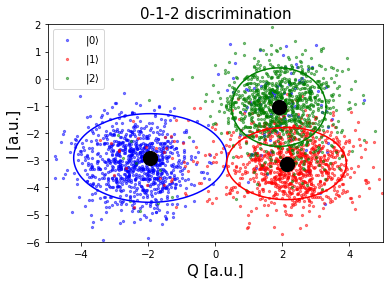

In [ ]:
## draw classifier for 0, 1, 2

# helper function
def draw_ellipse(c, q_center, i_center, q_radius, i_radius):
    t = np.linspace(0,360,360)
    q = q_center + q_radius*np.cos(np.radians(t))
    i = i_center + i_radius*np.sin(np.radians(t))
    plt.plot(q, i, c=c)

# zero data plotted in blue
plt.scatter(np.real(zero_data), np.imag(zero_data), 
                s=5, cmap='viridis', c='blue', alpha=0.5, label=r'$|0\rangle$')
# one data plotted in red
plt.scatter(np.real(one_data), np.imag(one_data), 
                s=5, cmap='viridis', c='red', alpha=0.5, label=r'$|1\rangle$')
# two data plotted in green
plt.scatter(np.real(two_data), np.imag(two_data), 
                s=5, cmap='viridis', c='green', alpha=0.5, label=r'$|2\rangle$')

# Plot a large dot for the average result of the 0, 1 and 2 states.
mean_zero = np.mean(zero_data) # takes mean of both real and imaginary parts
mean_one = np.mean(one_data)
mean_two = np.mean(two_data)

q_center_zero, i_center_zero = np.real(mean_zero), np.imag(mean_zero)
plt.scatter(q_center_zero, i_center_zero, 
            s=200, cmap='viridis', c='black',alpha=1.0)
q_center_one, i_center_one = np.real(mean_one), np.imag(mean_one)
plt.scatter(q_center_one, i_center_one, 
            s=200, cmap='viridis', c='black',alpha=1.0)
q_center_two, i_center_two = np.real(mean_two), np.imag(mean_two)
plt.scatter(q_center_two, i_center_two,
            s=200, cmap='viridis', c='black',alpha=1.0)

std_devs = 1.5
q_axis_zero, i_axis_zero = std_devs*np.std(zero_data)
draw_ellipse('blue', q_center_zero, i_center_zero, q_axis_zero, i_axis_zero)
q_axis_one, i_axis_one = std_devs*np.std(one_data)
draw_ellipse('red', q_center_one, i_center_one, q_axis_one, i_axis_one)
q_axis_two, i_axis_two = std_devs*np.std(two_data)
draw_ellipse('green', q_center_two, i_center_two, q_axis_two, i_axis_two)

plt.xlim(-5, 5)
plt.ylim(-6, 2)
plt.legend()
plt.ylabel('I [a.u.]', fontsize=15)
plt.xlabel('Q [a.u.]', fontsize=15)
plt.title("0-1-2 discrimination", fontsize=15)

In [ ]:
## classify points

def classify_inside(point, ellipses):
    classified = -1
    distance_to_classified = np.Infinity
    ct = 0
    for ellipse in ellipses:
        q_center, i_center, q_axis, i_axis = ellipse
        squared_sum = ((np.real(point) - q_center) / q_axis) ** 2 + ((np.imag(point) - i_center) / i_axis) ** 2
        if squared_sum <= 1 and squared_sum < distance_to_classified:
            classified = ct
            distance_to_classified = squared_sum
        ct += 1
    return classified

def classify_closest(point, ellipses):
    classified = -1
    distance_to_classified = np.Infinity
    ct = 0
    for ellipse in ellipses:
        q_center, i_center, q_axis, i_axis = ellipse
        squared_sum = ((np.real(point) - q_center) / q_axis) ** 2 + ((np.imag(point) - i_center) / i_axis) ** 2
        if squared_sum < distance_to_classified:
            classified = ct
            distance_to_classified = squared_sum
        ct += 1
    return classified

## Task 4

### Estimate the occupation probability for |0⟩, |1⟩, and |2⟩ near the calibrated $\pi$ pulse of the |0⟩ → |1⟩ transition

In [ ]:
## Set Rabi experiment parameters

# Rabi experiment parameters
num_rabi_points = 75
drive_amps = np.linspace(0, pi_amp * 2, num_rabi_points)

In [ ]:
## create a pulse schedule

drive_amp = Parameter('drive_amp')
with pulse.build(backend=backend, default_alignment='sequential', name='Rabi Experiment') as rabi_sched:
    drive_duration = get_closest_multiple_of_16(pulse.seconds_to_samples(drive_duration_sec))
    drive_sigma = pulse.seconds_to_samples(drive_sigma_sec)
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(rough_qubit_frequency, drive_chan)
    pulse.play(pulse.Gaussian(duration=drive_duration,
                              amp=drive_amp,
                              sigma=drive_sigma,
                              name='Rabi Pulse'), drive_chan)

In [ ]:
## create Rabi circuit

rabi_gate = Gate("rabi", 1, [drive_amp])

qc_rabi = QuantumCircuit(1, 1)

qc_rabi.append(rabi_gate, [0])
qc_rabi.measure(0, 0)
qc_rabi.add_calibration(rabi_gate, (0,), rabi_sched, [drive_amp])

exp_rabi_circs = [qc_rabi.assign_parameters({drive_amp: a}, inplace=False) for a in drive_amps]

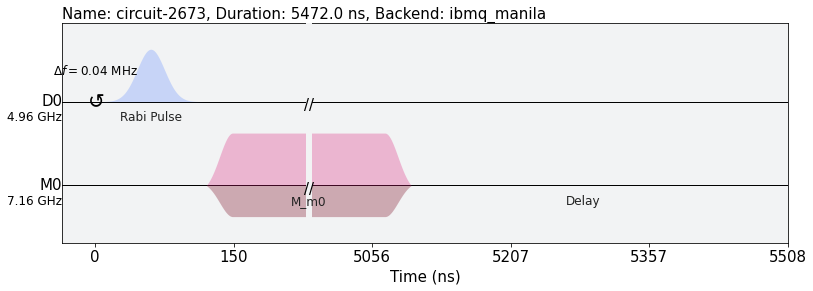

In [ ]:
## draw Rabi schedule

rabi_schedule = schedule(exp_rabi_circs[-1], backend)
rabi_schedule.draw(backend=backend)

In [ ]:
## run assembled program on backend

num_shots_per_point = 1024

job = backend.run(exp_rabi_circs, 
                  meas_level=1, 
                  meas_return='single', 
                  shots=num_shots_per_point)

In [ ]:
## monitor job status

job_monitor(job)

Job Status: job has successfully run


In [ ]:
## retrieve job results

rabi_results = job.result(timeout=120)

In [ ]:
## classify results

ellipses = [(q_center_zero, i_center_zero, q_axis_zero, i_axis_zero),
            (q_center_one, i_center_one, q_axis_one, i_axis_one),
            (q_center_two, i_center_two, q_axis_two, i_axis_two)]
            
amp_states = []
amp_classifications_inside = []
amp_classifications_closest = []

for j in range(75):
    states = []
    classifications_inside = []
    classifications_closest = []
    for i in range(num_rabi_points):
        state = rabi_results.get_memory(i)[j]
        states.append(state)
        classifications_inside.append(classify_inside(state * scale_factor, ellipses))
        classifications_closest.append(classify_closest(state * scale_factor, ellipses))

    amp_states.append(np.array(states))
    amp_classifications_inside.append(np.array(classifications_inside))
    amp_classifications_closest.append(np.array(classifications_closest))

In [ ]:
max_probability = 0
probabilities_inside = []
probabilities_closest = []
for j in range(len(amp_classifications_inside)):
    num_escaped_inside = np.count_nonzero(amp_classifications_inside[j] == -1) + np.count_nonzero(amp_classifications_inside[j] == 2)
    probability_inside = num_escaped_inside / num_rabi_points
    probabilities_inside.append(probability_inside)
for j in range(len(amp_classifications_closest)):
    num_escaped_closest = np.count_nonzero(amp_classifications_closest[j] == -1) + np.count_nonzero(amp_classifications_closest[j] == 2)
    probability_closest = num_escaped_closest / num_rabi_points
    probabilities_closest.append(probability_closest)

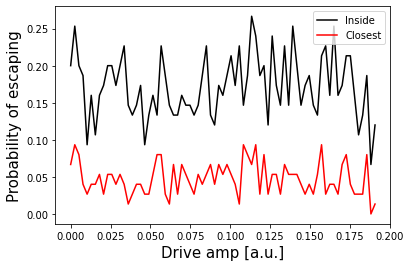

In [ ]:
plt.plot(drive_amps, probabilities_inside, color='black', label='Inside')
plt.plot(drive_amps, probabilities_closest, color='red', label='Closest')

plt.legend()
plt.xlabel("Drive amp [a.u.]", fontsize=15)
plt.ylabel("Probability of escaping", fontsize=15)
plt.show()

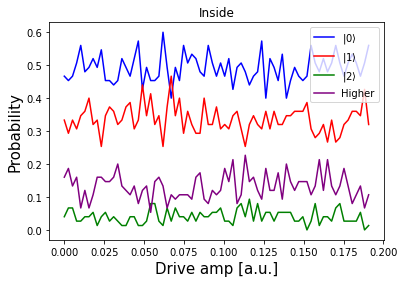

In [ ]:
## plot probabilities

zero_probabilities_inside = []
one_probabilities_inside = []
two_probabilities_inside = []
higher_probabilities_inside = []
for j in range(len(amp_classifications_inside)):
    num_zero = np.count_nonzero(amp_classifications_inside[j] == 0)
    zero_probabilities_inside.append(num_zero / num_rabi_points)
    num_one = np.count_nonzero(amp_classifications_inside[j] == 1)
    one_probabilities_inside.append(num_one / num_rabi_points)
    num_two = np.count_nonzero(amp_classifications_inside[j] == 2)
    two_probabilities_inside.append(num_two / num_rabi_points)
    num_higher = np.count_nonzero(amp_classifications_inside[j] == -1)
    higher_probabilities_inside.append(num_higher / num_rabi_points)

plt.plot(drive_amps, zero_probabilities_inside, color='blue', label=r'$|0\rangle$')
plt.plot(drive_amps, one_probabilities_inside, color='red', label=r'$|1\rangle$')
plt.plot(drive_amps, two_probabilities_inside, color='green', label=r'$|2\rangle$')
plt.plot(drive_amps, higher_probabilities_inside, color='purple', label='Higher')

plt.title('Inside')
plt.xlabel("Drive amp [a.u.]", fontsize=15)
plt.ylabel("Probability", fontsize=15)
plt.legend()
plt.show()

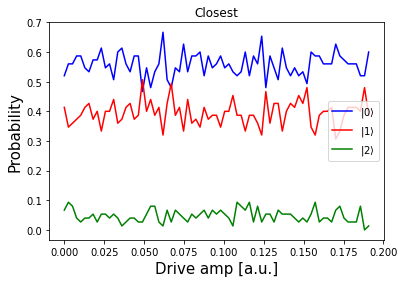

In [ ]:
## plot probabilities

zero_probabilities_closest = []
one_probabilities_closest = []
two_probabilities_closest = []
for j in range(len(amp_classifications_closest)):
    num_zero = np.count_nonzero(amp_classifications_closest[j] == 0)
    zero_probabilities_closest.append(num_zero / num_rabi_points)
    num_one = np.count_nonzero(amp_classifications_closest[j] == 1)
    one_probabilities_closest.append(num_one / num_rabi_points)
    num_two = np.count_nonzero(amp_classifications_closest[j] == 2)
    two_probabilities_closest.append(num_two / num_rabi_points)

plt.plot(drive_amps, zero_probabilities_closest, color='blue', label=r'$|0\rangle$')
plt.plot(drive_amps, one_probabilities_closest, color='red', label=r'$|1\rangle$')
plt.plot(drive_amps, two_probabilities_closest, color='green', label=r'$|2\rangle$')

plt.title('Closest')
plt.xlabel("Drive amp [a.u.]", fontsize=15)
plt.ylabel("Probability", fontsize=15)
plt.legend()
plt.show()

In [ ]:
## find max probability of escape
max_probability_index_inside = np.argmax(probabilities_inside)
max_probability_inside = probabilities_inside[max_probability_index_inside]
max_amps_inside = drive_amps[max_probability_index_inside]
max_states_inside = amp_states[max_probability_index_inside]
max_classifications_inside = amp_classifications_inside[max_probability_index_inside]
print(f"Inside")
print(f"Amps = {round(max_amps_inside, 5)}")
print(f"Probability of Escape = {round(max_probability_inside, 5)}")

Inside
Amps = 0.11343
Probability of Escape = 0.26667


Text(0.5, 1.0, 'Inside')

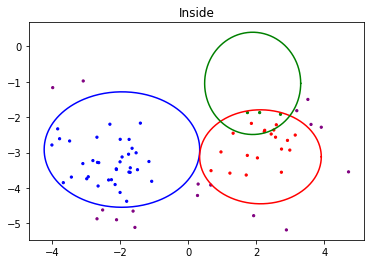

In [ ]:
## show IQ classifier of max probability of escape
color = np.where(max_classifications_inside == 0, 'blue',
        np.where(max_classifications_inside == 1, 'red',
        np.where(max_classifications_inside == 2, 'green',
        'purple')))
plt.scatter(np.real(max_states_inside) * scale_factor, np.imag(max_states_inside) * scale_factor, 
                s=5, cmap='viridis', c=color)
draw_ellipse('blue', q_center_zero, i_center_zero, q_axis_zero, i_axis_zero)
draw_ellipse('red', q_center_one, i_center_one, q_axis_one, i_axis_one)
draw_ellipse('green', q_center_two, i_center_two, q_axis_two, i_axis_two)

plt.title('Inside')

In [ ]:
## find max probability of escape
max_probability_index_closest = np.argmax(probabilities_closest)
max_probability_closest = probabilities_closest[max_probability_index_closest]
max_amps_closest = drive_amps[max_probability_index_closest]
max_states_closest = amp_states[max_probability_index_closest]
max_classifications_closest = amp_classifications_closest[max_probability_index_closest]
print(f"Closest")
print(f"Amps = {round(max_amps_closest, 5)}")
print(f"Probability of Escape = {round(max_probability_closest, 5)}")

Closest
Amps = 0.00258
Probability of Escape = 0.09333


Text(0.5, 1.0, 'Closest')

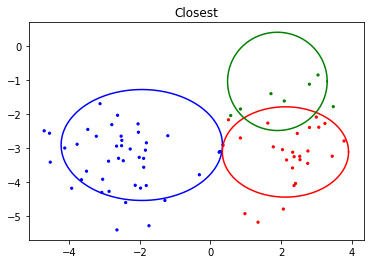

In [ ]:
## show IQ classifier of max probability of escape
color = np.where(max_classifications_closest == 0, 'blue',
        np.where(max_classifications_closest == 1, 'red',
        np.where(max_classifications_closest == 2, 'green',
        'purple')))
plt.scatter(np.real(max_states_closest) * scale_factor, np.imag(max_states_closest) * scale_factor, 
                s=5, cmap='viridis', c=color)
draw_ellipse('blue', q_center_zero, i_center_zero, q_axis_zero, i_axis_zero)
draw_ellipse('red', q_center_one, i_center_one, q_axis_one, i_axis_one)
draw_ellipse('green', q_center_two, i_center_two, q_axis_two, i_axis_two)

plt.title('Closest')

## Bonus

### Find the frequency of the |2⟩ → |3⟩ transition

In [ ]:
## define smaller range sweep
backend_properties = backend.properties()

freq_guess = qubit_12_freq + anharmonicity_01_12
power_guess = 0.275
num_freqs = 100
sweep_freqs = freq_guess + np.linspace(-300*MHz, 300*MHz, num_freqs)

# there are pulse parameters of the single qubit drive in IBM devices
x12_duration = 160
x12_sigma = 40
x23_duration = 160
x23_sigma = 40

In [ ]:
## create a pulse schedule
with pulse.build(backend=backend, default_alignment='sequential', name='x12 schedule') as x12_sched:
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(qubit_12_freq, drive_chan)
    pulse.play(pulse.Gaussian(duration=x12_duration,
                              amp=pi_amp_12,
                              sigma=x12_sigma,
                              name='x12_pulse'), drive_chan)

qubit_23_freq = Parameter('freq')
with pulse.build(backend=backend, default_alignment='sequential', name='Frequency sweep') as freq23_sweep_sched:
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(qubit_23_freq, drive_chan)
    pulse.play(pulse.Gaussian(duration=x23_duration,
                                amp=power_guess,
                                sigma=x23_sigma,
                                name='x23_pulse'), drive_chan)

In [ ]:
# prepare state

x12_gate = Gate("one_two_pulse", 1, [])
sweep_23_gate = Gate("two_three_pulse", 1, [qubit_23_freq])
qc_x23 = QuantumCircuit(1, 1)
qc_x23.x(0)
qc_x23.append(x12_gate, [0])
qc_x23.append(sweep_23_gate, [0])
qc_x23.measure(0, 0)
qc_x23.add_calibration(x12_gate, (0,), x12_sched, [])
qc_x23.add_calibration(sweep_23_gate, (0,), freq23_sweep_sched, [qubit_23_freq])
    
exp_x23_circs = [qc_x23.assign_parameters({qubit_23_freq: f}) for f in sweep_freqs]

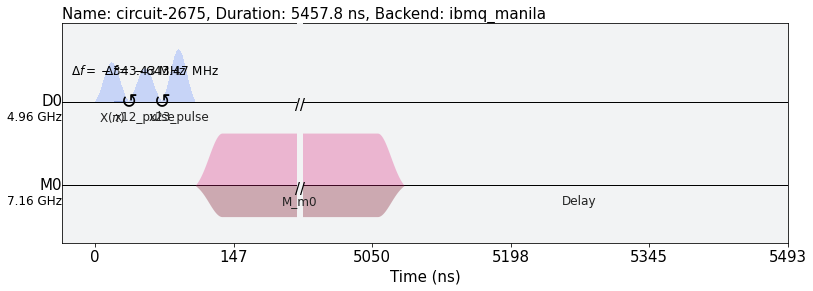

In [ ]:
## draw sweep schedule

freq23_sweep_sched = schedule(exp_x23_circs[0], backend)
freq23_sweep_sched.draw(backend=backend)

In [ ]:
## run assembled program on backend

num_shots_per_frequency = 1024

excited_freq_sweep_job = backend.run(exp_x23_circs, 
                                     meas_level=1, 
                                     meas_return='avg', 
                                     shots=num_shots_per_frequency)

In [ ]:
## monitor job status

job_monitor(excited_freq_sweep_job)

Job Status: job has successfully run


In [ ]:
## retrieve job results

excited_freq_sweep_data = get_job_data(excited_freq_sweep_job, average=True)
frequency_sweep_results = job.result(timeout=120)

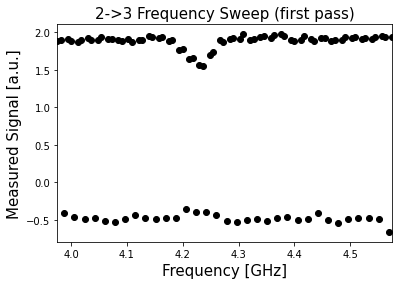

In [ ]:
## plot job results

plt.scatter(sweep_freqs / GHz, excited_freq_sweep_data, color='black')
plt.xlim([min(sweep_freqs / GHz), max(sweep_freqs / GHz)])
plt.xlabel("Frequency [GHz]", fontsize=15)
plt.ylabel("Measured Signal [a.u.]", fontsize=15)
plt.title("2->3 Frequency Sweep (first pass)", fontsize=15)
plt.show()

In [ ]:
## parse job results

excited_freq_sweep_data_np = np.array(excited_freq_sweep_data)
parsed_indices = np.sort(np.argwhere(np.logical_and(excited_freq_sweep_data_np > 0, np.logical_and(sweep_freqs / GHz > 4.15, sweep_freqs / GHz < 4.3))))
sweep_freqs_parsed = np.squeeze(np.array(sweep_freqs)[parsed_indices])
excited_freq_sweep_data_parsed = np.squeeze(np.array(excited_freq_sweep_data)[parsed_indices])

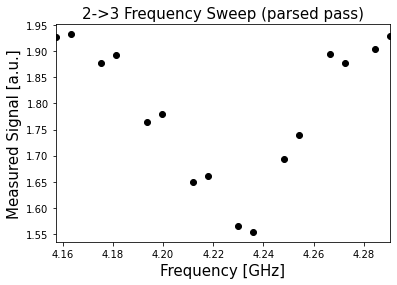

In [ ]:
## plot parsed results

plt.scatter(sweep_freqs_parsed/GHz, excited_freq_sweep_data_parsed, color='black')
plt.xlim([min(sweep_freqs_parsed/GHz), max(sweep_freqs_parsed/GHz)])
plt.xlabel("Frequency [GHz]", fontsize=15)
plt.ylabel("Measured Signal [a.u.]", fontsize=15)
plt.title("2->3 Frequency Sweep (parsed pass)", fontsize=15)
plt.show()

(16,)
(16,)


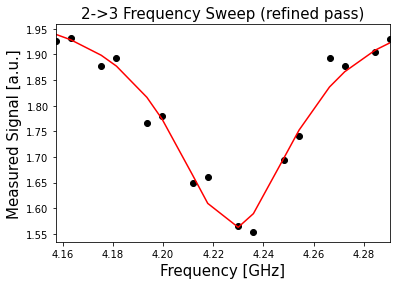

In [ ]:
## fit values to a curve

(excited_sweep_fit_params, 
 excited_sweep_y_fit) = fit_function(sweep_freqs_parsed,
                                     excited_freq_sweep_data_parsed, 
                                     lambda x, A, q_freq, B, C: (A / np.pi) * (B / ((x - q_freq)**2 + B**2)) + C,
                                     [-30, 4.22*GHz, 0.02*GHz, -0.9*GHz] # initial parameters for curve_fit
                                     )

# Note: only plotting the real part of the signal
plt.scatter(sweep_freqs_parsed/GHz, excited_freq_sweep_data_parsed, color='black')
plt.plot(sweep_freqs_parsed/GHz, excited_sweep_y_fit, color='red')
plt.xlim([min(sweep_freqs_parsed/GHz), max(sweep_freqs_parsed/GHz)])
plt.xlabel("Frequency [GHz]", fontsize=15)
plt.ylabel("Measured Signal [a.u.]", fontsize=15)
plt.title("2->3 Frequency Sweep (parsed pass)", fontsize=15)
plt.show()

In [ ]:
## derive frequency using peak

_, qubit_23_freq, _, _ = excited_sweep_fit_params
print(f"2->3 frequency: {round(qubit_23_freq/GHz, 5)} GHz.")

2->3 frequency: 4.22 GHz.


### Calibrate the $\pi$ pulse for the |2⟩ → |3⟩ transition using a Rabi experiment

In [ ]:
## Set Rabi experiment parameters

num_rabi_points = 100

# Drive amplitude values to iterate over: 75 amplitudes evenly spaced from 0 to 1.0
drive_amp_min = 0
drive_amp_max = 1.0
drive_amps = np.linspace(drive_amp_min, drive_amp_max, num_rabi_points)

In [ ]:
## Build Rabi experiments

with pulse.build(backend=backend, default_alignment='sequential', name='x12 schedule') as x12_sched:
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(qubit_12_freq, drive_chan)
    pulse.play(pulse.Gaussian(duration=x12_duration,
                              amp=pi_amp_12,
                              sigma=x12_sigma,
                              name='x12_pulse'), drive_chan)
                              
# A drive pulse at the qubit frequency, followed by a measurement, vary the drive amplitude each time
amp = Parameter('amp')
with pulse.build(backend=backend, default_alignment='sequential', name='Amp sweep') as rabi_sched_23:
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(qubit_23_freq, drive_chan)
    pulse.play(pulse.Gaussian(duration=x23_duration,
                              amp=amp,
                              sigma=x23_sigma,
                              name='x23_pulse'), drive_chan)

In [ ]:
## create Rabi circuit

x12_gate = Gate("one_two_pulse", 1, [])
rabi_gate = Gate("rabi", 1, [amp])

qc_rabi = QuantumCircuit(1, 1)

qc_rabi.x(0)
qc_rabi.append(x12_gate, [0])
qc_rabi.append(rabi_gate, [0])
qc_rabi.measure(0, 0)
qc_rabi.add_calibration(x12_gate, (0,), x12_sched, [])
qc_rabi.add_calibration(rabi_gate, (0,), rabi_sched_23, [amp])
    
exp_rabi_circs = [qc_rabi.assign_parameters({amp: a}) for a in drive_amps]

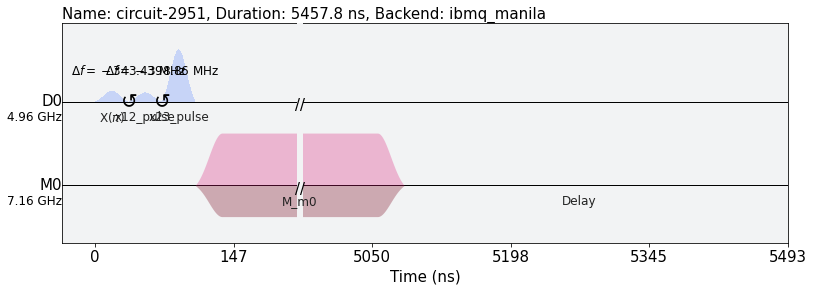

In [ ]:
## draw Rabi schedule

rabi_schedule = schedule(exp_rabi_circs[-1], backend)
rabi_schedule.draw(backend=backend)

In [ ]:
## run assembled program on backend

num_shots_per_frequency = 1024

rabi_23_job = backend.run(exp_rabi_circs, 
                          meas_level=1, 
                          meas_return='avg', 
                          shots=num_shots_per_frequency)

In [ ]:
## monitor job status

job_monitor(rabi_23_job)

Job Status: job has successfully run


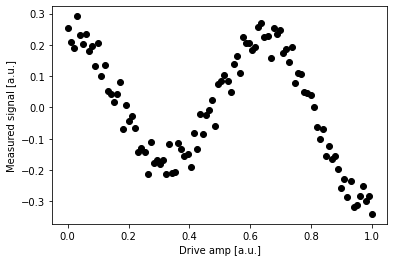

In [ ]:
## retrieve job results

rabi_23_data = np.real(baseline_remove(get_job_data(rabi_23_job, average=True)))

plt.xlabel("Drive amp [a.u.]")
plt.ylabel("Measured signal [a.u.]")
plt.scatter(drive_amps, rabi_23_data, color='black') # plot real part of Rabi values
plt.show()

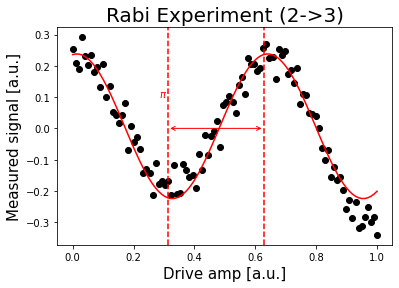

In [ ]:
## fit values to a curve

(rabi_23_fit_params, 
 rabi_23_y_fit) = fit_function(drive_amps,
                               rabi_23_data, 
                               lambda x, A, B, drive_23_period, phi: (A*np.cos(2*np.pi*x/drive_23_period - phi) + B),
                               [0.2, -np.pi, 0.3, 0])

plt.scatter(drive_amps, rabi_23_data, color='black')
plt.plot(drive_amps, rabi_23_y_fit, color='red')

drive_23_period = rabi_23_fit_params[2] 

pi_amp_23 = drive_23_period/2

plt.axvline(pi_amp_23, color='red', linestyle='--')
plt.axvline(pi_amp_23+drive_23_period/2, color='red', linestyle='--')
plt.annotate("", xy=(pi_amp_23+drive_23_period/2, 0), xytext=(pi_amp_23,0), arrowprops=dict(arrowstyle="<->", color='red'))
plt.annotate("$\pi$", xy=(pi_amp_23-0.03, 0.1), color='red')

plt.xlabel("Drive amp [a.u.]", fontsize=15)
plt.ylabel("Measured signal [a.u.]", fontsize=15)
plt.title('Rabi Experiment (2->3)', fontsize=20)
plt.show()

In [ ]:
## print pi amplitude

print(f"Pi Amplitude (2->3) = {round(pi_amp_23, 5)}")

Pi Amplitude (2->3) = 0.31371


### Build an IQ discriminator for distinguishing the states into |0⟩, |1⟩, |2⟩, and |3⟩

In [ ]:
## Schedule pulse from 1->2 and 2->3

with pulse.build(backend=backend, default_alignment='sequential', name='x12 schedule') as x12_sched:
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(qubit_12_freq, drive_chan)
    pulse.play(pulse.Gaussian(duration=x12_duration,
                              amp=pi_amp_12,
                              sigma=x12_sigma,
                              name='x12_pulse'), drive_chan)

with pulse.build(backend=backend, default_alignment='sequential', name='Amp sweep') as x23_sched:
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(qubit_23_freq, drive_chan)
    pulse.play(pulse.Gaussian(duration=x23_duration,
                              amp=pi_amp_23,
                              sigma=x23_sigma,
                              name='x23_pulse'), drive_chan)

In [ ]:
## Create 4 circuits

# 0 state
qc_ground = QuantumCircuit(1, 1)
qc_ground.measure(0, 0)

# 1 state
qc_one = QuantumCircuit(1, 1)
qc_one.x(0)
qc_one.measure(0, 0)

# 2 state 
x12_gate = Gate("one_two_pulse", 1, [])
qc_two = QuantumCircuit(1, 1)
qc_two.x(0)
qc_two.append(x12_gate, [0])
qc_two.measure(0, 0)
qc_two.add_calibration(x12_gate, (0,), x12_sched, [])

# 3 state 
x23_gate = Gate("two_three_pulse", 1, [])
qc_three = QuantumCircuit(1, 1)
qc_three.x(0)
qc_three.append(x12_gate, [0])
qc_three.append(x23_gate, [0])
qc_three.measure(0, 0)
qc_three.add_calibration(x12_gate, (0,), x12_sched, [])
qc_three.add_calibration(x23_gate, (0,), x23_sched, [])

In [ ]:
## run assembled program on backend

num_shots_per_frequency = 1024

IQ_0123_job = backend.run([qc_ground, qc_one, qc_two, qc_three], 
                          meas_level=1, 
                          meas_return='single', 
                          shots=num_shots_per_frequency)

In [ ]:
## monitor job status

job_monitor(IQ_0123_job)

Job Status: job has successfully run


In [ ]:
## retrieve job results

IQ_0123_data = get_job_data(IQ_0123_job, average=False)
zero_data = IQ_0123_data[0]
one_data = IQ_0123_data[1]
two_data = IQ_0123_data[2]
three_data = IQ_0123_data[3]

Text(0.5, 1.0, '0-1-2-3 discrimination')

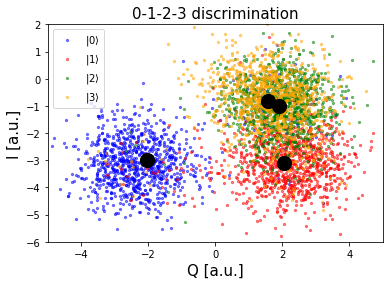

In [ ]:
## plot the distributions for 0, 1, 2, 3

# one data plotted in blue
plt.scatter(np.real(zero_data), np.imag(zero_data), 
                s=5, cmap='viridis', c='blue', alpha=0.5, label=r'$|0\rangle$')
# one data plotted in red
plt.scatter(np.real(one_data), np.imag(one_data), 
                s=5, cmap='viridis', c='red', alpha=0.5, label=r'$|1\rangle$')
# two data plotted in green
plt.scatter(np.real(two_data), np.imag(two_data), 
                s=5, cmap='viridis', c='green', alpha=0.5, label=r'$|2\rangle$')
# three data plotted in yellow
plt.scatter(np.real(three_data), np.imag(three_data), 
                s=5, cmap='viridis', c='orange', alpha=0.5, label=r'$|3\rangle$')

# Plot a large dot for the average result of the 0, 1 and 2 states.
mean_zero = np.mean(zero_data) # takes mean of both real and imaginary parts
mean_one = np.mean(one_data)
mean_two = np.mean(two_data)
mean_three = np.mean(three_data)

plt.scatter(np.real(mean_zero), np.imag(mean_zero), 
            s=200, cmap='viridis', c='black',alpha=1.0)
plt.scatter(np.real(mean_one), np.imag(mean_one), 
            s=200, cmap='viridis', c='black',alpha=1.0)
plt.scatter(np.real(mean_two), np.imag(mean_two), 
            s=200, cmap='viridis', c='black',alpha=1.0)
plt.scatter(np.real(mean_three), np.imag(mean_three), 
            s=200, cmap='viridis', c='black',alpha=1.0)

plt.xlim(-5, 5)
plt.ylim(-6, 2)
plt.legend()
plt.ylabel('I [a.u.]', fontsize=15)
plt.xlabel('Q [a.u.]', fontsize=15)
plt.title("0-1-2-3 discrimination", fontsize=15)

Text(0.5, 1.0, '0-1-2-3 discrimination')

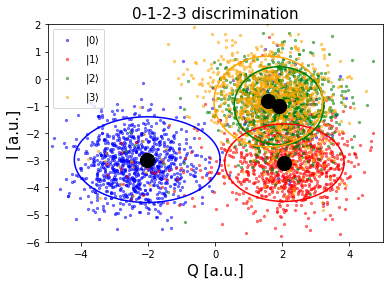

In [ ]:
## draw classifier for 0, 1, 2, 3

# zero data plotted in blue
plt.scatter(np.real(zero_data), np.imag(zero_data), 
                s=5, cmap='viridis', c='blue', alpha=0.5, label=r'$|0\rangle$')
# one data plotted in red
plt.scatter(np.real(one_data), np.imag(one_data), 
                s=5, cmap='viridis', c='red', alpha=0.5, label=r'$|1\rangle$')
# two data plotted in green
plt.scatter(np.real(two_data), np.imag(two_data), 
                s=5, cmap='viridis', c='green', alpha=0.5, label=r'$|2\rangle$')
# three data plotted in yellow
plt.scatter(np.real(three_data), np.imag(three_data), 
                s=5, cmap='viridis', c='orange', alpha=0.5, label=r'$|3\rangle$')

# Plot a large dot for the average result of the 0, 1 and 2 states.
mean_zero = np.mean(zero_data) # takes mean of both real and imaginary parts
mean_one = np.mean(one_data)
mean_two = np.mean(two_data)
mean_three = np.mean(three_data)

q_center_zero, i_center_zero = np.real(mean_zero), np.imag(mean_zero)
plt.scatter(q_center_zero, i_center_zero, 
            s=200, cmap='viridis', c='black',alpha=1.0)
q_center_one, i_center_one = np.real(mean_one), np.imag(mean_one)
plt.scatter(q_center_one, i_center_one, 
            s=200, cmap='viridis', c='black',alpha=1.0)
q_center_two, i_center_two = np.real(mean_two), np.imag(mean_two)
plt.scatter(q_center_two, i_center_two,
            s=200, cmap='viridis', c='black',alpha=1.0)
q_center_three, i_center_three = np.real(mean_three), np.imag(mean_three)
plt.scatter(q_center_three, i_center_three,
            s=200, cmap='viridis', c='black',alpha=1.0)

std_devs = 1.5
q_axis_zero, i_axis_zero = std_devs*np.std(np.real(zero_data)), std_devs*np.std(np.imag(zero_data))
draw_ellipse('blue', q_center_zero, i_center_zero, q_axis_zero, i_axis_zero)
q_axis_one, i_axis_one = std_devs*np.std(np.real(one_data)), std_devs*np.std(np.imag(one_data))
draw_ellipse('red', q_center_one, i_center_one, q_axis_one, i_axis_one)
q_axis_two, i_axis_two = std_devs*np.std(np.real(two_data)), std_devs*np.std(np.imag(two_data))
draw_ellipse('green', q_center_two, i_center_two, q_axis_two, i_axis_two)
q_axis_three, i_axis_three = std_devs*np.std(np.real(three_data)), std_devs*np.std(np.imag(three_data))
draw_ellipse('orange', q_center_three, i_center_three, q_axis_three, i_axis_three)

plt.xlim(-5, 5)
plt.ylim(-6, 2)
plt.legend()
plt.ylabel('I [a.u.]', fontsize=15)
plt.xlabel('Q [a.u.]', fontsize=15)
plt.title("0-1-2-3 discrimination", fontsize=15)

### Estimate the occupation probability for |0⟩, |1⟩, |2⟩, and |3⟩ near the calibrated $\pi$ pulse of the |0⟩ → |1⟩ transition

In [ ]:
## Set Rabi experiment parameters

# Rabi experiment parameters
num_rabi_points = 75
drive_amps = np.linspace(0, pi_amp * 2, num_rabi_points)

In [ ]:
## create a pulse schedule

drive_amp = Parameter('drive_amp')
with pulse.build(backend=backend, default_alignment='sequential', name='Rabi Experiment') as rabi_sched:
    drive_duration = get_closest_multiple_of_16(pulse.seconds_to_samples(drive_duration_sec))
    drive_sigma = pulse.seconds_to_samples(drive_sigma_sec)
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(rough_qubit_frequency, drive_chan)
    pulse.play(pulse.Gaussian(duration=drive_duration,
                              amp=drive_amp,
                              sigma=drive_sigma,
                              name='Rabi Pulse'), drive_chan)

In [ ]:
## create Rabi circuit

rabi_gate = Gate("rabi", 1, [drive_amp])

qc_rabi = QuantumCircuit(1, 1)

qc_rabi.append(rabi_gate, [0])
qc_rabi.measure(0, 0)
qc_rabi.add_calibration(rabi_gate, (0,), rabi_sched, [drive_amp])

exp_rabi_circs = [qc_rabi.assign_parameters({drive_amp: a}, inplace=False) for a in drive_amps]

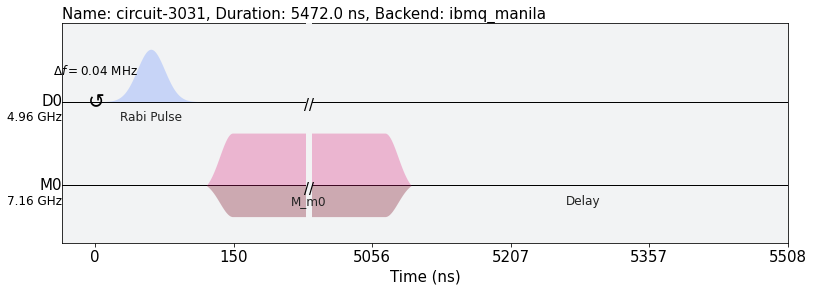

In [ ]:
## draw Rabi schedule

rabi_schedule = schedule(exp_rabi_circs[-1], backend)
rabi_schedule.draw(backend=backend)

In [ ]:
## run assembled program on backend

num_shots_per_point = 1024

job = backend.run(exp_rabi_circs, 
                  meas_level=1, 
                  meas_return='single', 
                  shots=num_shots_per_point)

In [ ]:
## monitor job status

job_monitor(job)

Job Status: job is queued (7)     

KeyboardInterrupt: 

In [ ]:
## retrieve job results

rabi_results = job.result(timeout=120)

In [ ]:
## classify results

ellipses = [(q_center_zero, i_center_zero, q_axis_zero, i_axis_zero),
            (q_center_one, i_center_one, q_axis_one, i_axis_one),
            (q_center_two, i_center_two, q_axis_two, i_axis_two),
            (q_center_three, i_center_three, q_axis_three, i_axis_three)]
            
amp_states = []
amp_classifications_inside = []
amp_classifications_closest = []

for j in range(num_rabi_points):
    states = []
    classifications_inside = []
    classifications_closest = []
    for i in range(num_rabi_points):
        state = rabi_results.get_memory(i)[j]
        states.append(state)
        classifications_inside.append(classify_inside(state * scale_factor, ellipses))
        classifications_closest.append(classify_closest(state * scale_factor, ellipses))

    amp_states.append(np.array(states))
    amp_classifications_inside.append(np.array(classifications_inside))
    amp_classifications_closest.append(np.array(classifications_closest))

In [ ]:
max_probability = 0
probabilities_inside = []
probabilities_closest = []
for j in range(len(amp_classifications_inside)):
    num_escaped_inside = np.count_nonzero(amp_classifications_inside[j] == -1) + np.count_nonzero(amp_classifications_inside[j] == 2)
    probability_inside = num_escaped_inside / num_rabi_points
    probabilities_inside.append(probability_inside)
for j in range(len(amp_classifications_closest)):
    num_escaped_closest = np.count_nonzero(amp_classifications_closest[j] == -1) + np.count_nonzero(amp_classifications_closest[j] == 2)
    probability_closest = num_escaped_closest / num_rabi_points
    probabilities_closest.append(probability_closest)

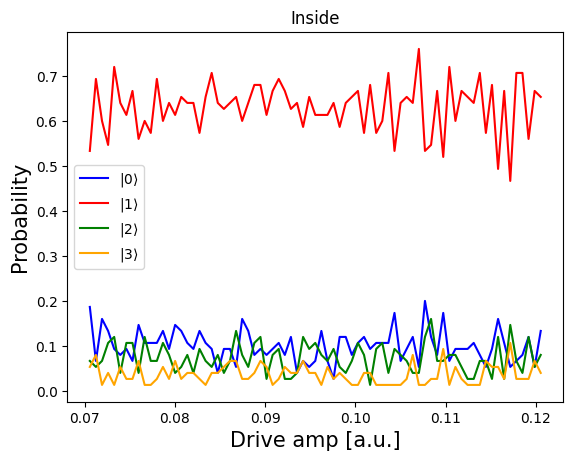

In [ ]:
## plot probabilities

zero_probabilities_inside = []
one_probabilities_inside = []
two_probabilities_inside = []
three_probabilities_inside = []
for j in range(len(amp_classifications_inside)):
    num_zero = np.count_nonzero(amp_classifications_inside[j] == 0)
    zero_probabilities_inside.append(num_zero / num_rabi_points)
    num_one = np.count_nonzero(amp_classifications_inside[j] == 1)
    one_probabilities_inside.append(num_one / num_rabi_points)
    num_two = np.count_nonzero(amp_classifications_inside[j] == 2)
    two_probabilities_inside.append(num_two / num_rabi_points)
    num_three = np.count_nonzero(amp_classifications_inside[j] == 3)
    three_probabilities_inside.append(num_three / num_rabi_points)

plt.plot(drive_amps, zero_probabilities_inside, color='blue', label=r'$|0\rangle$')
plt.plot(drive_amps, one_probabilities_inside, color='red', label=r'$|1\rangle$')
plt.plot(drive_amps, two_probabilities_inside, color='green', label=r'$|2\rangle$')
plt.plot(drive_amps, three_probabilities_inside, color='orange', label=r'$|3\rangle$')

plt.title('Inside')
plt.xlabel("Drive amp [a.u.]", fontsize=15)
plt.ylabel("Probability", fontsize=15)
plt.legend()
plt.show()

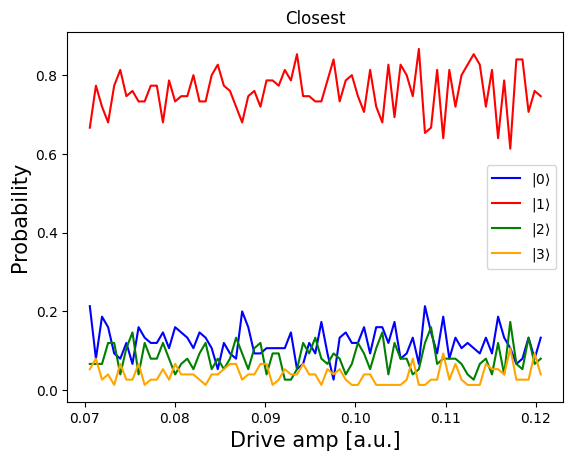

In [ ]:
## plot probabilities

zero_probabilities_closest = []
one_probabilities_closest = []
two_probabilities_closest = []
three_probabilities_closest = []
for j in range(len(amp_classifications_closest)):
    num_zero = np.count_nonzero(amp_classifications_closest[j] == 0)
    zero_probabilities_closest.append(num_zero / num_rabi_points)
    num_one = np.count_nonzero(amp_classifications_closest[j] == 1)
    one_probabilities_closest.append(num_one / num_rabi_points)
    num_two = np.count_nonzero(amp_classifications_closest[j] == 2)
    two_probabilities_closest.append(num_two / num_rabi_points)
    num_three = np.count_nonzero(amp_classifications_closest[j] == 3)
    three_probabilities_closest.append(num_three / num_rabi_points)

plt.plot(drive_amps, zero_probabilities_closest, color='blue', label=r'$|0\rangle$')
plt.plot(drive_amps, one_probabilities_closest, color='red', label=r'$|1\rangle$')
plt.plot(drive_amps, two_probabilities_closest, color='green', label=r'$|2\rangle$')
plt.plot(drive_amps, three_probabilities_closest, color='orange', label=r'$|3\rangle$')

plt.title('Closest')
plt.xlabel("Drive amp [a.u.]", fontsize=15)
plt.ylabel("Probability", fontsize=15)
plt.legend()
plt.show()

### Estimate the occupation probability for |0⟩, |1⟩, |2⟩, and |3⟩ near the calibrated frequency of the |0⟩ → |1⟩ transition

In [ ]:
## Drive pulse parameters

gap = 40 * MHz
frequency_min = rough_qubit_frequency - gap / 2
frequency_max = rough_qubit_frequency + gap / 2
frequency_step = 1 * MHz
# Construct an np array of the frequencies for our experiment
frequencies = np.arange(frequency_min, 
                        frequency_max, 
                        frequency_step)

In [ ]:
## create a pulse schedule

# Create the base schedule, start with drive pulse acting on the drive channel
freq = Parameter('freq')
with pulse.build(backend=backend, default_alignment='sequential', name='Frequency sweep') as sweep_sched:
    drive_duration = get_closest_multiple_of_16(pulse.seconds_to_samples(drive_duration_sec))
    drive_sigma = pulse.seconds_to_samples(drive_sigma_sec)
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(freq, drive_chan)
    # Drive pulse samples
    pulse.play(pulse.Gaussian(duration=drive_duration,
                              sigma=drive_sigma,
                              amp=pi_amp,
                              name='freq_sweep_excitation_pulse'), drive_chan)

In [ ]:
## create sweep

sweep_gate = Gate("sweep", 1, [freq])

qc_sweep = QuantumCircuit(1, 1)

qc_sweep.append(sweep_gate, [0])
qc_sweep.measure(0, 0)
qc_sweep.add_calibration(sweep_gate, (0,), sweep_sched, [freq])

exp_sweep_circs = [qc_sweep.assign_parameters({freq: f}, inplace=False) for f in frequencies]

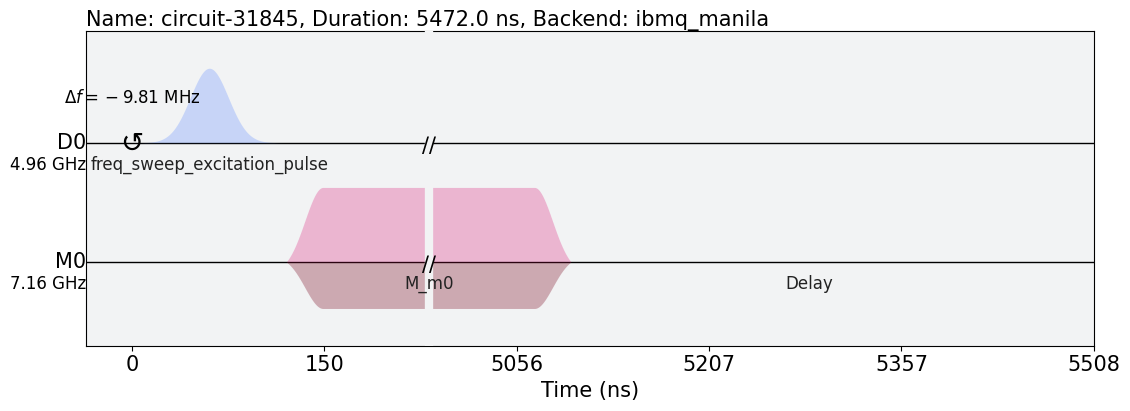

In [ ]:
## draw sweep schedule

sweep_schedule = schedule(exp_sweep_circs[0], backend)
sweep_schedule.draw(backend=backend)

In [ ]:
## run assembled program on backend

num_shots_per_frequency = 1024

job = backend.run(exp_sweep_circs, 
                  meas_level=1, 
                  meas_return='avg', 
                  shots=num_shots_per_frequency)

In [ ]:
## monitor job status

job_monitor(job)

Job Status: job has successfully run


In [ ]:
## retrieve job results

frequency_sweep_results = job.result(timeout=120)

In [ ]:
## classify results

ellipses = [(q_center_zero, i_center_zero, q_axis_zero, i_axis_zero),
            (q_center_one, i_center_one, q_axis_one, i_axis_one),
            (q_center_two, i_center_two, q_axis_two, i_axis_two),
            (q_center_three, i_center_three, q_axis_three, i_axis_three)]
            
freq_states = []
freq_classifications_inside = []
freq_classifications_closest = []

for j in range(len(frequencies)):
    states = []
    classifications_inside = []
    classifications_closest = []
    for i in range(num_rabi_points):
        state = rabi_results.get_memory(i)[j]
        states.append(state)
        classifications_inside.append(classify_inside(state * scale_factor, ellipses))
        classifications_closest.append(classify_closest(state * scale_factor, ellipses))

    freq_states.append(np.array(states))
    freq_classifications_inside.append(np.array(classifications_inside))
    freq_classifications_closest.append(np.array(classifications_closest))

In [ ]:
max_probability = 0
probabilities_inside = []
probabilities_closest = []
for j in range(len(freq_classifications_inside)):
    num_escaped_inside = np.count_nonzero(freq_classifications_inside[j] == -1) + np.count_nonzero(freq_classifications_inside[j] == 2)
    probability_inside = num_escaped_inside / num_rabi_points
    probabilities_inside.append(probability_inside)
for j in range(len(freq_classifications_closest)):
    num_escaped_closest = np.count_nonzero(freq_classifications_closest[j] == -1) + np.count_nonzero(freq_classifications_closest[j] == 2)
    probability_closest = num_escaped_closest / num_rabi_points
    probabilities_closest.append(probability_closest)

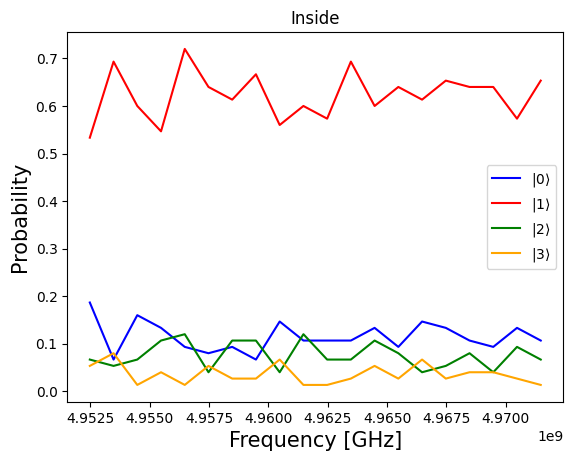

In [ ]:
## plot probabilities

zero_probabilities_inside = []
one_probabilities_inside = []
two_probabilities_inside = []
three_probabilities_inside = []
for j in range(len(freq_classifications_inside)):
    num_zero = np.count_nonzero(freq_classifications_inside[j] == 0)
    zero_probabilities_inside.append(num_zero / num_rabi_points)
    num_one = np.count_nonzero(freq_classifications_inside[j] == 1)
    one_probabilities_inside.append(num_one / num_rabi_points)
    num_two = np.count_nonzero(freq_classifications_inside[j] == 2)
    two_probabilities_inside.append(num_two / num_rabi_points)
    num_three = np.count_nonzero(freq_classifications_inside[j] == 3)
    three_probabilities_inside.append(num_three / num_rabi_points)

plt.plot(frequencies, zero_probabilities_inside, color='blue', label=r'$|0\rangle$')
plt.plot(frequencies, one_probabilities_inside, color='red', label=r'$|1\rangle$')
plt.plot(frequencies, two_probabilities_inside, color='green', label=r'$|2\rangle$')
plt.plot(frequencies, three_probabilities_inside, color='orange', label=r'$|3\rangle$')

plt.title('Inside')
plt.xlabel("Frequency [GHz]", fontsize=15)
plt.ylabel("Probability", fontsize=15)
plt.legend()
plt.show()

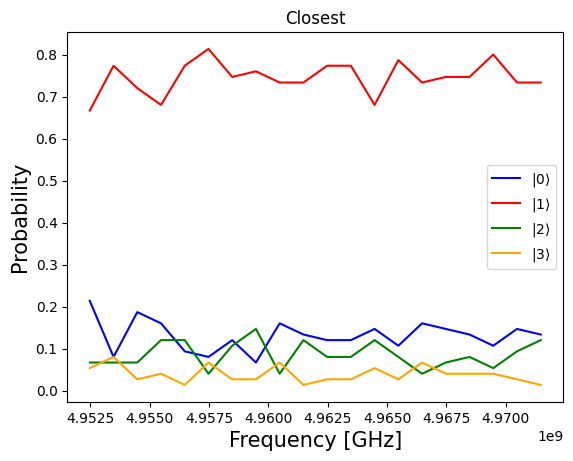

In [ ]:
## plot probabilities

zero_probabilities_closest = []
one_probabilities_closest = []
two_probabilities_closest = []
three_probabilities_closest = []
for j in range(len(freq_classifications_closest)):
    num_zero = np.count_nonzero(freq_classifications_closest[j] == 0)
    zero_probabilities_closest.append(num_zero / num_rabi_points)
    num_one = np.count_nonzero(freq_classifications_closest[j] == 1)
    one_probabilities_closest.append(num_one / num_rabi_points)
    num_two = np.count_nonzero(freq_classifications_closest[j] == 2)
    two_probabilities_closest.append(num_two / num_rabi_points)
    num_three = np.count_nonzero(freq_classifications_closest[j] == 3)
    three_probabilities_closest.append(num_three / num_rabi_points)

plt.plot(frequencies, zero_probabilities_closest, color='blue', label=r'$|0\rangle$')
plt.plot(frequencies, one_probabilities_closest, color='red', label=r'$|1\rangle$')
plt.plot(frequencies, two_probabilities_closest, color='green', label=r'$|2\rangle$')
plt.plot(frequencies, three_probabilities_closest, color='orange', label=r'$|3\rangle$')

plt.title('Closest')
plt.xlabel("Frequency [GHz]", fontsize=15)
plt.ylabel("Probability", fontsize=15)
plt.legend()
plt.show()